<a href="https://colab.research.google.com/github/ckjen168/LLMColab/blob/main/stk_ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH-04 讓 AI 計算技術指標及資料視覺化

## 4-1 技術指標公式太複雜？讓 AI 自動化計算

### 1️⃣ 安裝及匯入套件

In [ ]:
!pip install openai
!pip install yfinance
from  openai import OpenAI, OpenAIError # 串接 OpenAI API
import yfinance as yf
import pandas as pd # 資料處理套件
import datetime as dt # 時間套件

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.4/262.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00


### 2️⃣ 取得股票資料

In [ ]:
# 輸入股票代號
stock_id = "2330.tw"
# 抓取半年資料
end = dt.date.today() # 資料結束時間
start = end - dt.timedelta(days=180) # 資料開始時間
df = yf.download(stock_id, start=start, auto_adjust=False, multi_level_index=False).reset_index()

print(df)

[*********************100%%**********************]  1 of 1 completed

          Date   Open   High    Low  Close   Adj Close    Volume
0   2023-09-27  517.0  523.0  516.0  522.0  516.872253  16846401
1   2023-09-28  523.0  525.0  520.0  523.0  517.862427  19733331
2   2023-10-02  530.0  534.0  528.0  533.0  527.764221  25427911
3   2023-10-03  528.0  533.0  528.0  529.0  523.803467  14490129
4   2023-10-04  521.0  523.0  519.0  520.0  514.891907  28358964
..         ...    ...    ...    ...    ...         ...       ...
111 2024-03-18  754.0  765.0  754.0  764.0  764.000000  43589856
112 2024-03-19  758.0  765.0  755.0  762.0  762.000000  30152375
113 2024-03-20  764.0  769.0  752.0  758.0  758.000000  41280325
114 2024-03-21  773.0  784.0  772.0  784.0  784.000000  46026103
115 2024-03-22  788.0  789.0  775.0  785.0  785.000000  30660820

[116 rows x 7 columns]


### 3️⃣ 輸入 OpenAI API KEY

In [ ]:
import getpass
api_key = getpass.getpass("請輸入金鑰：")
client = OpenAI(api_key=api_key)

請輸入金鑰：··········


### 4️⃣ 創建 GPT 3.5 模型函式

In [ ]:
# GPT 3.5 模型
def get_reply(messages):
  try:
    response = client.chat.completions.create(model="gpt-3.5-turbo",
                         messages=messages)
    reply = response.choices[0].message.content
  except OpenAIError as err:
    reply = f"發生 {err.type} 錯誤\n{err.message}"
  return reply

# 設定 AI 角色, 使其依據使用者需求進行 df 處理
def ai_helper(df, user_msg):

  msg = [{
    "role":
    "system",
    "content":
    f"As a professional code generation robot, \
      I require your assistance in generating Python code \
      based on specific user requirements. To proceed, \
      I will provide you with a dataframe (df) that follows the \
      format {df.columns}. Your task is to carefully analyze the \
      user's requirements and generate the Python code \
      accordingly.Please note that your response should solely \
      consist of the code itself, \
      and no additional information should be included."
  }, {
    "role":
    "user",
    "content":
    f"The user requirement:{user_msg} \n\
       Your task is to develop a Python function named \
      'calculate(df)'. This function should accept a dataframe as \
      its parameter. Ensure that you only utilize the columns \
      present in the dataset, specifically {df.columns}. \
      After processing, the function should return the processed \
      dataframe. Your response should strictly contain the Python \
      code for the 'calculate(df)' function \
      and exclude any unrelated content."
  }]

  reply_data = get_reply(msg)
  cleaned_code = reply_data.replace("```", "")
  cleaned_code = cleaned_code.replace("python", "")

  return cleaned_code

### 讓 AI 自動生成技術指標程式碼

### 5️⃣ 計算移動平均線

In [ ]:
code_str = ai_helper(df, "計算8日MA與13日MA ")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()

def calculate(df):
    df['8_MA'] = df['Close'].rolling(window=8).mean()
    df['13_MA'] = df['Close'].rolling(window=13).mean()
    
    return df


,Date,Open,High,Low,Close,Adj Close,Volume,8_MA,13_MA
111,2024-03-18,754.0,765.0,754.0,764.0,764.0,43589856,770.000,748.384615
112,2024-03-19,758.0,765.0,755.0,762.0,762.0,30152375,770.250,753.923077
113,2024-03-20,764.0,769.0,752.0,758.0,758.0,41280325,767.000,759.230769
114,2024-03-21,773.0,784.0,772.0,784.0,784.0,46026103,769.250,763.769231
115,2024-03-22,788.0,789.0,775.0,785.0,785.0,30660820,771.125,768.000000


### 6️⃣ 計算 MACD

In [ ]:
code_str = ai_helper(df, "先計算 EMA 再計算 MACD, 欄位名稱用 MACD_Histogram 命名")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()

def calculate(df):
    df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()
    df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()
    df['MACD'] = df['EMA_8'] - df['EMA_13']
    df['MACD_Histogram'] = df['MACD'] - df['MACD'].ewm(span=9, adjust=False).mean()
    
    return df


,Date,Open,High,Low,Close,Adj Close,Volume,8_MA,13_MA,EMA_8,EMA_13,MACD,MACD_Histogram
111,2024-03-18,754.0,765.0,754.0,764.0,764.0,43589856,770.000,748.384615,760.656947,748.533893,12.123054,-2.226600
112,2024-03-19,758.0,765.0,755.0,762.0,762.0,30152375,770.250,753.923077,760.955403,750.457622,10.497781,-3.081499
113,2024-03-20,764.0,769.0,752.0,758.0,758.0,41280325,767.000,759.230769,760.298647,751.535105,8.763542,-3.852590
114,2024-03-21,773.0,784.0,772.0,784.0,784.0,46026103,769.250,763.769231,765.565614,756.172947,9.392667,-2.578772
115,2024-03-22,788.0,789.0,775.0,785.0,785.0,30660820,771.125,768.000000,769.884367,760.291098,9.593269,-1.902536


### 7️⃣ 計算 RSI

In [ ]:
code_str = ai_helper(df, "計算 RSI ")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()

def calculate(df):
    df['Change'] = df['Close'] - df['Close'].shift(1)
    df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)
    df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)
    df['Avg Gain'] = df['Gain'].rolling(window=14).mean()
    df['Avg Loss'] = df['Loss'].rolling(window=14).mean()
    df['RS'] = df['Avg Gain'] / df['Avg Loss']
    df['RSI'] = 100 - (100 / (1 + df['RS']))
    return df


,Date,Open,High,Low,Close,Adj Close,Volume,8-day MA,13-day MA,EMA_8,EMA_13,MACD,MACD_Histogram,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
119,2023-12-14,581.0,582.0,579.0,582.0,582.0,39409958,573.375,574.307692,575.836763,574.579909,1.256854,0.524243,5.0,5.0,0.0,2.071429,1.571429,1.318182,56.862745
120,2023-12-15,585.0,586.0,580.0,585.0,585.0,54323262,575.250,575.076923,577.873038,576.068493,1.804545,0.547690,3.0,3.0,0.0,2.285714,1.071429,2.133333,68.085106
121,2023-12-18,579.0,585.0,577.0,585.0,585.0,26122277,577.125,575.923077,579.456807,577.344423,2.112384,0.307840,0.0,0.0,0.0,1.785714,1.071429,1.666667,62.500000
122,2023-12-19,588.0,588.0,580.0,585.0,585.0,28254292,579.500,576.538462,580.688628,578.438077,2.250551,0.138167,0.0,0.0,0.0,1.785714,1.000000,1.785714,64.102564
123,2023-12-20,587.0,587.0,583.0,585.0,585.0,38121456,581.375,577.000000,581.646710,579.375494,2.271216,0.020665,0.0,0.0,0.0,1.571429,1.000000,1.571429,61.111111


### 8️⃣ 計算布林通道

In [ ]:
code_str = ai_helper(df, "請計算1.5個標準差的布林通道, 欄位以 Upper_Band 和 Lower_Band 命名")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()

def calculate(df):
    df['Upper_Band'] = df['13-day MA'] + 1.5 * df['Close'].rolling(13).std()
    df['Lower_Band'] = df['13-day MA'] - 1.5 * df['Close'].rolling(13).std()
    return df


,Date,Open,High,Low,Close,Adj Close,Volume,8-day MA,13-day MA,EMA_8,...,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,Upper_Band,Lower_Band,OBV
119,2023-12-14,581.0,582.0,579.0,582.0,582.0,39409958,573.375,574.307692,575.836763,...,5.0,5.0,0.0,2.071429,1.571429,1.318182,56.862745,580.942391,567.672993,164492026
120,2023-12-15,585.0,586.0,580.0,585.0,585.0,54323262,575.250,575.076923,577.873038,...,3.0,3.0,0.0,2.285714,1.071429,2.133333,68.085106,583.072114,567.081732,218815288
121,2023-12-18,579.0,585.0,577.0,585.0,585.0,26122277,577.125,575.923077,579.456807,...,0.0,0.0,0.0,1.785714,1.071429,1.666667,62.500000,584.890968,566.955185,218815288
122,2023-12-19,588.0,588.0,580.0,585.0,585.0,28254292,579.500,576.538462,580.688628,...,0.0,0.0,0.0,1.785714,1.000000,1.785714,64.102564,586.271435,566.805488,218815288
123,2023-12-20,587.0,587.0,583.0,585.0,585.0,38121456,581.375,577.000000,581.646710,...,0.0,0.0,0.0,1.571429,1.000000,1.571429,61.111111,587.319884,566.680116,218815288


### 9️⃣ 能量潮指標 (On-Balance Volumem, OBV)

In [ ]:
code_str = ai_helper(df, "計算 OBV 指標")
print(code_str)
exec(code_str)
new_df = calculate(df)
new_df.tail()

def calculate(df):
    df['OBV'] = 0
    
    for i in range(1, len(df)):
        if df['Close'].iloc[i] > df['Close'].iloc[i-1]:
            df.at[i, 'OBV'] = df['OBV'].iloc[i-1] + df['Volume'].iloc[i]
        elif df['Close'].iloc[i] < df['Close'].iloc[i-1]:
            df.at[i, 'OBV'] = df['OBV'].iloc[i-1] - df['Volume'].iloc[i]
        else:
            df.at[i, 'OBV'] = df['OBV'].iloc[i-1]
    
    return df


,Date,Open,High,Low,Close,Adj Close,Volume,8-day MA,13-day MA,EMA_8,...,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,Upper_Band,Lower_Band,OBV
119,2023-12-14,581.0,582.0,579.0,582.0,582.0,39409958,573.375,574.307692,575.836763,...,5.0,5.0,0.0,2.071429,1.571429,1.318182,56.862745,610.055561,553.944439,164492026
120,2023-12-15,585.0,586.0,580.0,585.0,585.0,54323262,575.250,575.076923,577.873038,...,3.0,3.0,0.0,2.285714,1.071429,2.133333,68.085106,613.055561,556.944439,218815288
121,2023-12-18,579.0,585.0,577.0,585.0,585.0,26122277,577.125,575.923077,579.456807,...,0.0,0.0,0.0,1.785714,1.071429,1.666667,62.500000,613.055561,556.944439,218815288
122,2023-12-19,588.0,588.0,580.0,585.0,585.0,28254292,579.500,576.538462,580.688628,...,0.0,0.0,0.0,1.785714,1.000000,1.785714,64.102564,613.055561,556.944439,218815288
123,2023-12-20,587.0,587.0,583.0,585.0,585.0,38121456,581.375,577.000000,581.646710,...,0.0,0.0,0.0,1.571429,1.000000,1.571429,61.111111,613.055561,556.944439,218815288


### 讓 AI 自動統整 Dataframe

### 🔟 將日頻資料轉換成月頻資料

In [ ]:
code_str = ai_helper(df, "請將日K線的資料轉換成月K線 ")
print(code_str)
exec(code_str)
new_df = df
df_monthly = new_df
df_monthly = calculate(df_monthly)
df_monthly.tail()

def calculate(df):
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Resample the dataframe to monthly frequency
    df_resampled = df.resample('M', on='Date')

    # Aggregate the data using the monthly mean
    df_processed = df_resampled.mean()
    
    return df_processed


,Open,High,Low,Close,Adj Close,Volume,8-day MA,13-day MA,EMA_8,EMA_13,...,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,Upper_Band,Lower_Band,OBV
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-31,550.954545,553.772727,546.863636,549.818182,543.926467,1.952047e+07,552.102273,554.965035,552.704335,555.263470,...,-0.727273,2.136364,2.863636,1.642857,2.899351,0.595640,35.181657,577.873743,521.762620,-1.015186e+08
2023-09-30,537.700000,541.850000,535.500000,538.400000,534.246686,2.066877e+07,543.425000,544.973077,542.476833,544.114905,...,-1.300000,2.050000,3.350000,2.610714,3.228571,0.866002,44.951575,566.455561,510.344439,-1.923012e+08
2023-10-31,538.600000,542.100000,535.950000,539.200000,536.396530,2.496152e+07,537.293750,536.157692,537.595990,537.215592,...,0.300000,3.350000,3.050000,3.396429,2.975000,1.223855,53.062985,567.255561,511.144439,-1.482421e+08
2023-11-30,566.000000,569.272727,563.045455,566.909091,563.961553,2.415192e+07,560.431818,556.545455,560.745920,557.360045,...,2.181818,3.363636,1.181818,3.155844,1.613636,3.539031,67.493473,594.964652,538.853530,5.718857e+06
2023-12-31,577.571429,580.071429,573.928571,577.142857,575.227277,2.992745e+07,574.821429,575.148352,575.441442,574.297597,...,0.571429,1.571429,1.000000,1.826531,1.790816,1.156805,51.477569,605.198419,549.087296,1.404538e+08


## 4-2 資料視覺化

### 1️⃣1️⃣ 安裝及匯入套件

In [ ]:
import matplotlib.pyplot as plt

### 畫出簡易股價圖

### 1️⃣2️⃣ 讓我們再一次檢視資料格式吧！

In [ ]:
new_df = new_df.reset_index() # 重設 index
new_df['Date'] = pd.to_datetime(new_df['Date']) # 將 Date 轉換為 datetime 類別
new_df.tail()

,index,Date,Open,High,Low,Close,Adj Close,Volume,8-day MA,13-day MA,...,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,Upper_Band,Lower_Band,OBV
119,119,2023-12-14,581.0,582.0,579.0,582.0,582.0,39409958,573.375,574.307692,...,5.0,5.0,0.0,2.071429,1.571429,1.318182,56.862745,580.942391,567.672993,164492026
120,120,2023-12-15,585.0,586.0,580.0,585.0,585.0,54323262,575.250,575.076923,...,3.0,3.0,0.0,2.285714,1.071429,2.133333,68.085106,583.072114,567.081732,218815288
121,121,2023-12-18,579.0,585.0,577.0,585.0,585.0,26122277,577.125,575.923077,...,0.0,0.0,0.0,1.785714,1.071429,1.666667,62.500000,584.890968,566.955185,218815288
122,122,2023-12-19,588.0,588.0,580.0,585.0,585.0,28254292,579.500,576.538462,...,0.0,0.0,0.0,1.785714,1.000000,1.785714,64.102564,586.271435,566.805488,218815288
123,123,2023-12-20,587.0,587.0,583.0,585.0,585.0,38121456,581.375,577.000000,...,0.0,0.0,0.0,1.571429,1.000000,1.571429,61.111111,587.319884,566.680116,218815288


### 1️⃣3️⃣ 使用 matplotlib 畫出收盤價的折線圖

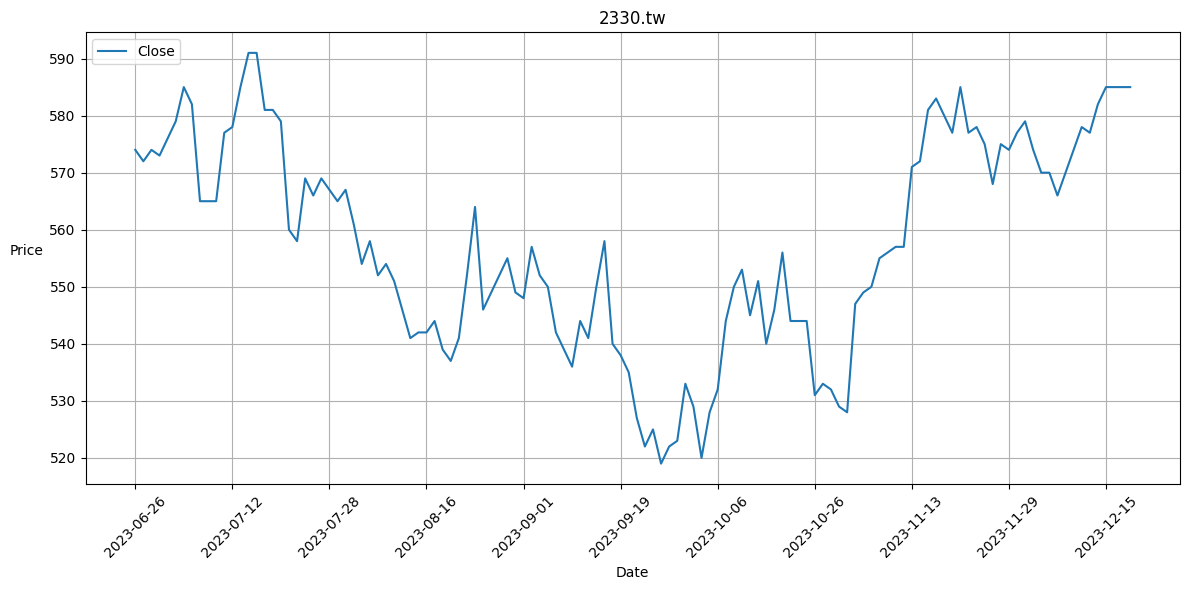

In [ ]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 6))

# 設定要繪製的資料欄位
plt.plot(new_df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,
           date[::len(date)//num], rotation = 45)

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price', rotation=0, ha='right')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()

# 顯示圖表
plt.show()

### 1️⃣4️⃣ 加入成交量

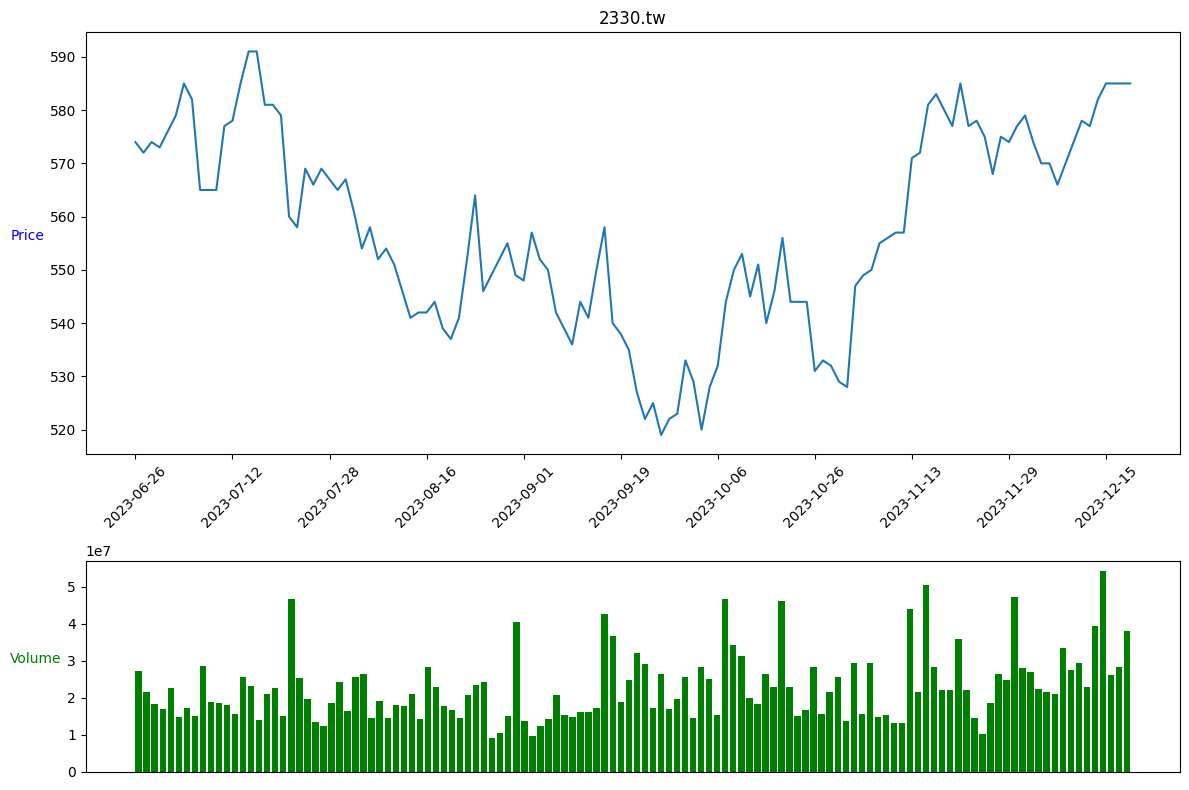

In [ ]:
# 創建兩張子圖
fig, (ax1, ax2) = plt.subplots(2, 1,
                figsize=(12, 8),
                gridspec_kw={'height_ratios': [2, 1]})

# 設定 x 軸時間
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')

# 繪製收盤價
ax1.plot(new_df['Close'], label='Close')
ax1.set_title(f'{stock_id}')
ax1.set_ylabel('Price', color='blue', rotation=0, ha='right')
ax1.set_xticks(date[::len(date)//num].index)
ax1.set_xticklabels(date[::len(date)//num], rotation=45)

# 繪製交易量
ax2.bar(new_df.index, new_df['Volume'],  color='green')
ax2.set_ylabel('Volume', color='green', rotation=0, ha='right')
ax2.set_xticks([]) # 不顯示日期標籤
# 若要顯示圖表標籤可以使用以下程式碼
# ax2.set_xticks(date[::len(date)//num].index)
# ax2.set_xticklabels(date[::len(date)//num], rotation=45)

# 讓子圖填充、對齊
plt.tight_layout()

# 顯示圖表
plt.show()


### 1️⃣5️⃣ 加入技術指標

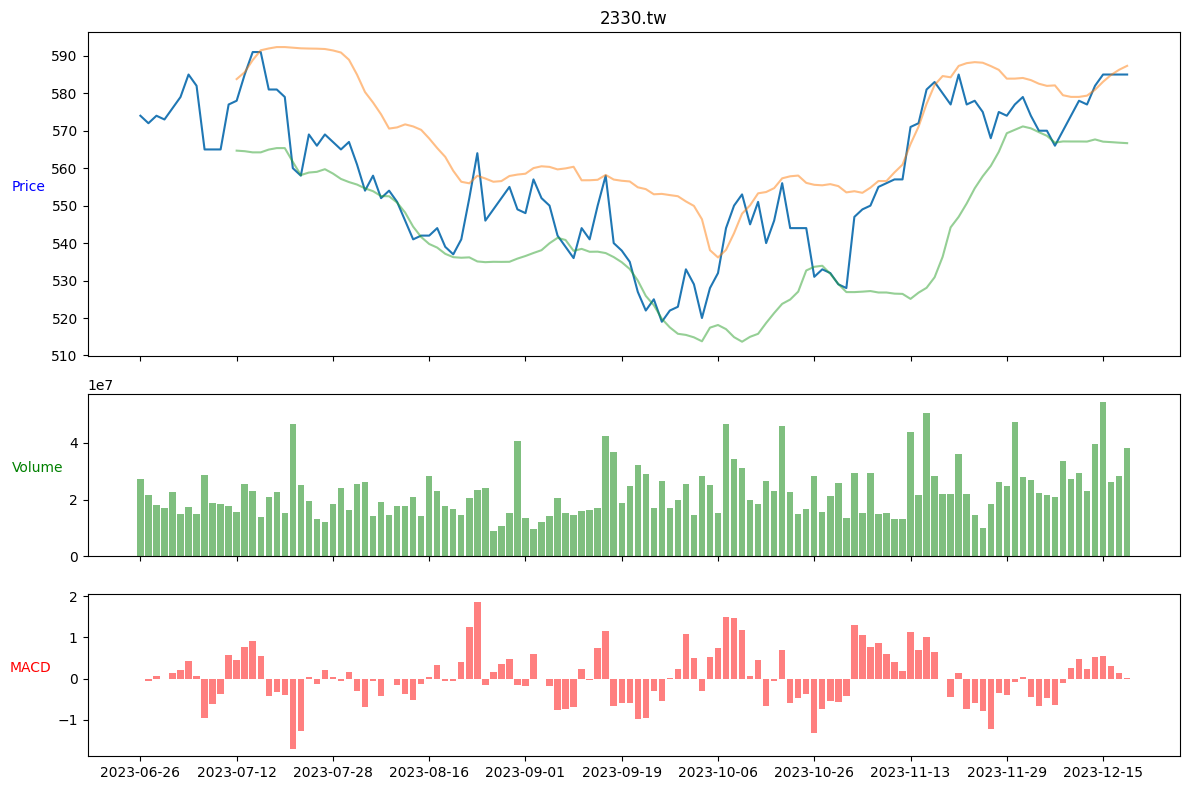

In [ ]:
# 創建三個子圖
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,
                    figsize=(12, 8),
                    gridspec_kw={'height_ratios': [2, 1, 1]},
                    sharex=True)

# 設定 x 軸時間
num = 10
date = new_df["Date"].dt.strftime('%Y-%m-%d')

# 繪製收盤價
ax1.plot(new_df['Close'], label='Close')
# 加入布林通道
ax1.plot(new_df['Upper_Band'], alpha=0.5) # alpha 設定透明度
ax1.plot(new_df['Lower_Band'], alpha=0.5)
ax1.set_title(f'{stock_id}')
ax1.set_ylabel('Price', color='blue', rotation=0, ha='right')
ax1.set_xticks(date[::len(date)//num].index)
ax1.set_xticklabels(date[::len(date)//num])

# 繪製交易量
ax2.bar(new_df.index, new_df['Volume'], alpha=0.5, color='green')
ax2.set_ylabel('Volume', color='green', rotation=0, ha='right')

# 繪製技術指標
ax3.bar(new_df.index, new_df['MACD_Histogram'], alpha=0.5, color='red')
ax3.set_ylabel('MACD', color='red', rotation=0, ha='right')

# 調整子圖間的距離
plt.tight_layout()

# 顯示圖表
plt.show()

### 繪製 K 線圖：mplfinance

### 1️⃣6️⃣ 匯入技術分析繪圖套件

In [ ]:
!pip install mplfinance
import mplfinance as mpf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


### 1️⃣7️⃣ 選擇資料時間

In [ ]:
kplot_df = new_df.set_index('Date')
kplot_df = kplot_df['2024-02-01':'2024-07-29']
kplot_df.tail()

,index,Open,High,Low,Close,Adj Close,Volume,8-day MA,13-day MA,EMA_8,...,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,Upper_Band,Lower_Band,OBV
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-14,119,581.0,582.0,579.0,582.0,582.0,39409958,573.375,574.307692,575.836763,...,5.0,5.0,0.0,2.071429,1.571429,1.318182,56.862745,580.942391,567.672993,164492026
2023-12-15,120,585.0,586.0,580.0,585.0,585.0,54323262,575.250,575.076923,577.873038,...,3.0,3.0,0.0,2.285714,1.071429,2.133333,68.085106,583.072114,567.081732,218815288
2023-12-18,121,579.0,585.0,577.0,585.0,585.0,26122277,577.125,575.923077,579.456807,...,0.0,0.0,0.0,1.785714,1.071429,1.666667,62.500000,584.890968,566.955185,218815288
2023-12-19,122,588.0,588.0,580.0,585.0,585.0,28254292,579.500,576.538462,580.688628,...,0.0,0.0,0.0,1.785714,1.000000,1.785714,64.102564,586.271435,566.805488,218815288
2023-12-20,123,587.0,587.0,583.0,585.0,585.0,38121456,581.375,577.000000,581.646710,...,0.0,0.0,0.0,1.571429,1.000000,1.571429,61.111111,587.319884,566.680116,218815288


### 1️⃣8️⃣ 用 mplfinance 繪製 K 線圖

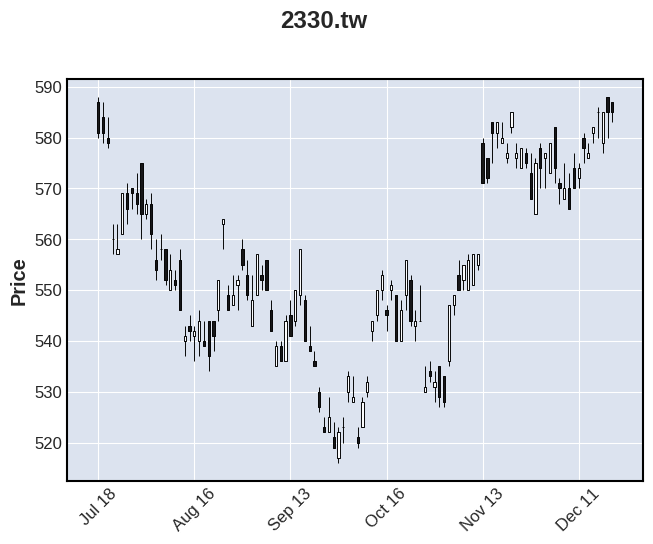

In [ ]:
mpf.plot(kplot_df, type='candle', title=f'{stock_id}')

### 1️⃣9️⃣ 加入繪圖設定

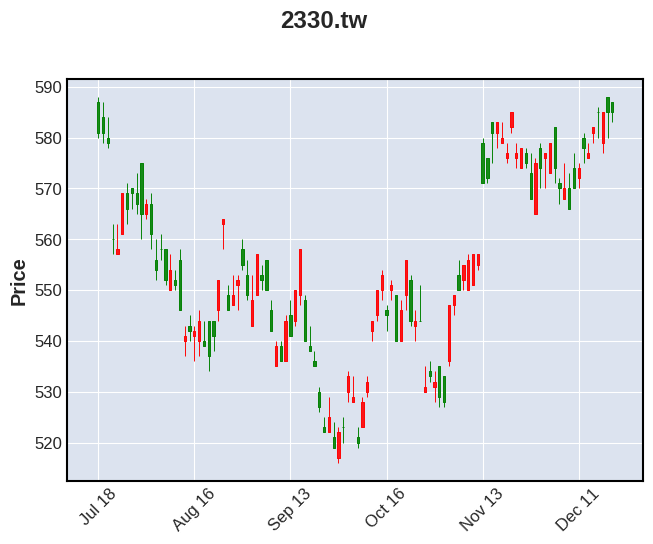

In [ ]:
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)
# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle',
    style=my_style, title=f'{stock_id}')

### 2️⃣0️⃣ 加入子圖

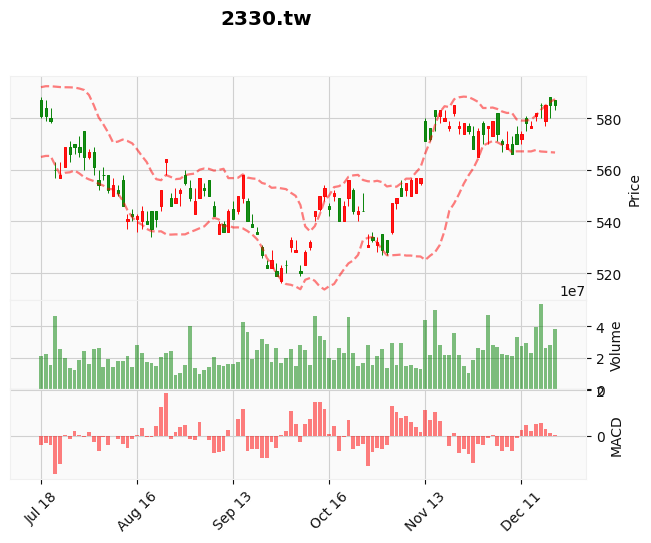

In [ ]:
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='yahoo',
                marketcolors=my_color)

# 交易量和技術指標子圖
ap = [
    # 上軌線
    mpf.make_addplot(kplot_df['Upper_Band'], color='red',
                      alpha=0.5, linestyle='--'),
    # 下軌線
    mpf.make_addplot(kplot_df['Lower_Band'], color='red',
                     alpha=0.5, linestyle='--'),
    # 成交量
    mpf.make_addplot(kplot_df['Volume'], panel=1, type='bar',
                     color='g', alpha=0.5, ylabel='Volume'),
    # MACD
    mpf.make_addplot(kplot_df['MACD_Histogram'], panel=2, type='bar',
                     color='r', alpha=0.5, ylabel='MACD')
]

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', addplot=ap,
          style=my_style, title=f'{stock_id}')

## 4-3 plotly 互動式圖表

### 2️⃣1️⃣ 檢視資料

In [ ]:
bk_df = new_df
bk_df.index = bk_df["Date"].dt.strftime('%Y-%m-%d')
bk_df.tail()

,index,Date,Open,High,Low,Close,Adj Close,Volume,8-day MA,13-day MA,...,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,Upper_Band,Lower_Band,OBV
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-14,119,2023-12-14,581.0,582.0,579.0,582.0,582.0,39409958,573.375,574.307692,...,5.0,5.0,0.0,2.071429,1.571429,1.318182,56.862745,580.942391,567.672993,164492026
2023-12-15,120,2023-12-15,585.0,586.0,580.0,585.0,585.0,54323262,575.250,575.076923,...,3.0,3.0,0.0,2.285714,1.071429,2.133333,68.085106,583.072114,567.081732,218815288
2023-12-18,121,2023-12-18,579.0,585.0,577.0,585.0,585.0,26122277,577.125,575.923077,...,0.0,0.0,0.0,1.785714,1.071429,1.666667,62.500000,584.890968,566.955185,218815288
2023-12-19,122,2023-12-19,588.0,588.0,580.0,585.0,585.0,28254292,579.500,576.538462,...,0.0,0.0,0.0,1.785714,1.000000,1.785714,64.102564,586.271435,566.805488,218815288
2023-12-20,123,2023-12-20,587.0,587.0,583.0,585.0,585.0,38121456,581.375,577.000000,...,0.0,0.0,0.0,1.571429,1.000000,1.571429,61.111111,587.319884,566.680116,218815288


### 2️⃣2️⃣ 匯入 plotly 套件

In [ ]:
import plotly.graph_objects as go

### 2️⃣3️⃣ 繪製互動式 K 線圖

In [ ]:
# 創建 K 線圖
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])

# 調整寬高
fig.update_layout(
    height=800,
    width=1200
)

# 顯示圖表
fig.show()

### 2️⃣4️⃣ 移除非交易日空值
解決繪圖不連續問題

In [ ]:
# 創建 K 線圖
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])

# 調整寬高
fig.update_layout(
    height=800,
    width=1200
)

# 移除非交易日空值
# 生成該日期範圍內的所有日期
all_dates = pd.date_range(start=bk_df.index.min(),
              end=bk_df.index.max())
# 找出不在資料中的日期
breaks = all_dates[~all_dates.isin(bk_df.index)]
dt_breaks = breaks.tolist() # 轉換成列表
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

# 顯示圖表
fig.show()

### 2️⃣5️⃣ 加入懸停十字軸

In [ ]:
# 創建 K 線圖
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red',
            decreasing_line_color='green')])


# 圖表更新-加入懸停十字軸
fig.update_xaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")
fig.update_yaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")
fig.update_layout(
    height=800,
    width=1200
)


# 移除非交易日空值
all_dates = pd.date_range(start=bk_df.index.min(), end=bk_df.index.max()) # 生成該日期範圍內的所有日期
breaks = all_dates[~all_dates.isin(bk_df.index)] # 找出不在資料中的日期
dt_breaks = breaks.tolist() # 轉換成列表
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

fig.show()

### 2️⃣6️⃣ 加入技術指標

In [ ]:
# 創建 K 線圖
fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
            open=bk_df['Open'],
            high=bk_df['High'],
            low=bk_df['Low'],
            close=bk_df['Close'],
            increasing_line_color='red', decreasing_line_color='green',
            name = "K 線")])


# 布林通道
fig.add_trace(go.Scatter(
    x=bk_df.index, y=bk_df['Upper_Band'],mode='lines',
    line={'color': 'green','dash': 'dash'},name = "上軌線"))
fig.add_trace(go.Scatter(
    x=bk_df.index, y=bk_df['Lower_Band'], mode='lines',
    line={'color': 'green', 'dash': 'dash'},name = "下軌線"))

# 交易量
fig.add_trace(go.Bar(
    x=bk_df.index, y=bk_df['Volume'], marker={'color': 'green'},
      yaxis='y2', name = "交易量"))

# MACD
fig.add_trace(go.Bar(
    x=bk_df.index, y=bk_df['MACD_Histogram'], marker={'color': 'red'},
      yaxis='y3', name = "MACD"))

# 加入懸停十字軸
fig.update_xaxes(showspikes=True, spikecolor="gray",
                 spikemode="toaxis")
fig.update_yaxes(showspikes=True, spikecolor="gray",
                 spikemode="across")

# 更新畫布大小並增加範圍選擇
fig.update_layout(
    height=800,
    yaxis={'domain': [0.35, 1]},
    yaxis2={'domain': [0.15, 0.3]},
    yaxis3={'domain': [0, 0.15]},
    title=f"{stock_id}",
    xaxis={
        # 範圍選擇格
        'rangeselector': {
            'buttons': [
                {'count': 1, 'label': '1M',
                  'step': 'month', 'stepmode': 'backward'},
                {'count': 6, 'label': '6M',
                  'step': 'month', 'stepmode': 'backward'},
                {'count': 1, 'label': '1Y',
                  'step': 'year', 'stepmode': 'backward'},
                {'step': 'all'}
            ]
        },
        # 範圍滑動條
        'rangeslider': {
            'visible': True,
            # 滑動條的高度 (設置 0.01 就會變單純的 bar)
            'thickness': 0.01,
            'bgcolor': "#E4E4E4"  # 背景色
        },
        'type': 'date'
    }
)


# 移除非交易日空值
all_dates = pd.date_range(start=bk_df.index.min(), end=bk_df.index.max()) # 生成該日期範圍內的所有日期
breaks = all_dates[~all_dates.isin(bk_df.index)] # 找出不在資料中的日期
dt_breaks = breaks.tolist() # 轉換成列表
fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

fig.show()

### 2️⃣7️⃣ 寫成函式

In [ ]:
# 下載資料並讓 AI 計算指標
def download_stock_data(stock_id, start=None,
                        end=None, indicator='MACD'):
    stock_id = f"{stock_id}.tw"
    if not end:
        end = dt.date.today()
    if not start:
        start = end - dt.timedelta(days=365)
    # 從 yf 下載資料
    df = yf.download(stock_id, start=start, end=end).reset_index()

    # AI 計算技術指標
    code_str = ai_helper(df, f"計算{indicator}")
    print(code_str)

    # 將 exec 生成的 calculate 設為局部變數
    local_vars = {}
    exec(code_str, globals(), local_vars)
    calculate = local_vars['calculate']

    df = calculate(df)

    # 資料處理
    bk_df = df.reset_index()
    bk_df.index = bk_df["Date"].dt.strftime('%Y-%m-%d')

    return bk_df

# 繪製圖表函式
def create_stock_figure(stock_id, bk_df):

    # 創建 K 線圖
    fig = go.Figure(data=[go.Candlestick(x=bk_df.index,
                        open=bk_df['Open'],
                        high=bk_df['High'],
                        low=bk_df['Low'],
                        close=bk_df['Close'],
                        increasing_line_color='red',
                        decreasing_line_color='green',
                        name = "K 線")])

    # 交易量
    fig.add_trace(go.Bar(x=bk_df.index, y=bk_df['Volume'],
                         marker={'color': 'green'}, yaxis='y2',
                           name = "交易量"))

    # 找出需要繪製的欄位
    columns = bk_df.columns
    exclude_columns = ['index','Date', 'Open', 'High',
                        'Low', 'Close', 'Adj Close', 'Volume']
    remain_columns = [col for col in columns if
                       col not in exclude_columns]
    min_close = bk_df['Close'].min() - bk_df['Close'].std()
    max_close = bk_df['Close'].max() + bk_df['Close'].std()
    # 繪製技術指標
    for i in remain_columns:
      if min_close <= bk_df[i].mean() <= max_close:
        fig.add_trace(go.Scatter(x=bk_df.index, y=bk_df[i],
                                  mode='lines', name=i))
      else:
        fig.add_trace(go.Scatter(x=bk_df.index, y=bk_df[i],
                                  mode='lines', yaxis='y3', name=i))

    # 加入懸停十字軸
    fig.update_xaxes(showspikes=True, spikecolor="gray",
                    spikemode="toaxis")
    fig.update_yaxes(showspikes=True, spikecolor="gray",
                    spikemode="across")
    # 更新畫布大小並增加範圍選擇
    fig.update_layout(
        height=800,
        width=1200,
        yaxis={'domain': [0.35, 1]},
        yaxis2={'domain': [0.15, 0.3]},
        # 若要重疊 y1 和 y3, 可以改成
        # yaxis3=dict(overlaying='y', side='right')
        yaxis3={'domain': [0, 0.15]},
        title=f"{stock_id}",
        xaxis={
            # 範圍選擇格
            'rangeselector': {
                'buttons': [
                    {'count': 1, 'label': '1M',
                      'step': 'month', 'stepmode': 'backward'},
                    {'count': 6, 'label': '6M',
                      'step': 'month', 'stepmode': 'backward'},
                    {'count': 1, 'label': '1Y',
                      'step': 'year', 'stepmode': 'backward'},
                    {'step': 'all'}
                ]
            },
            # 範圍滑動條
            'rangeslider': {
                'visible': True,
                'thickness': 0.01,  # 滑動條的高度
                'bgcolor': "#E4E4E4"  # 背景色
            },
            'type': 'date'
        }
    )

    # 移除非交易日空值
    # 生成該日期範圍內的所有日期
    all_dates = pd.date_range(start=bk_df.index.min(),
                               end=bk_df.index.max())
    # 找出不在資料中的日期
    breaks = all_dates[~all_dates.isin(bk_df.index)]
    dt_breaks = breaks.tolist() # 轉換成列表格式
    fig.update_xaxes(rangebreaks=[{'values': dt_breaks}])

    return fig

# 主函式
def plotly_stock(stock_id, start=None, end=None, indicator='MACD'):

    df = download_stock_data(stock_id, start, end, indicator)
    fig = create_stock_figure(stock_id,df)
    fig.show()

### 2️⃣8️⃣ 執行函式

In [ ]:
plotly_stock("2317", start='2022-01-01', end= None,
             indicator='布林通道及MACD')

[*********************100%%**********************]  1 of 1 completed
def calculate(df):
    # Calculate Bollinger Bands
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['STD20'] = df['Close'].rolling(window=20).std()
    df['UpperBand'] = df['MA20'] + 2 * df['STD20']
    df['LowerBand'] = df['MA20'] - 2 * df['STD20']

    # Calculate MACD
    df['EMA12'] = df['Close'].ewm(span=12).mean()
    df['EMA26'] = df['Close'].ewm(span=26).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['SignalLine'] = df['MACD'].ewm(span=9).mean()

    return df
